# Crawling

## 학습목표
 1. HTTP(HyperText Transport Protocol) 개념 이해
 2. Crawling 개념 이해 
 2. BeautifulSoup module을 이용한 초간단 Crawling 실습 및 이해

### 1. HTTP(HyperText Transport Protocol)
 - 프로토콜: 네트워크 통신 규약
 - 인터넷 프로토콜: TCP 및 IP 프로토콜이 핵심, TCP/IP 프로토콜
 - HTTP 프로토콜: WWW(웹)상에서 문서 전송을 위한 프로토콜
 - request(요청) / response(응답) 으로 구성
   - browser(클라이언트)가 요청하면 web server(서버)가 HTML 파일이나 다른 자원(이미지, 텍스트, 동영상 등)을 응답으로 전송
   - request의 형태에는 대표적으로 GET / POST 가 있음
     - GET 방식  : 데이터 전달을 URL 내에서 함
       - https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0
       - 네이버 검색, 구글 검색 등
     - POST 방식 : 데이터 전송을 FORM을 통해서 함(사용자에게 직접적으로 노출되지 않음)
       - ID, 비밀번호 전달의 경우
       - [참고 - FORM을 통해 데이터를 전달하는 POST 방식 기본 설명](http://cloudstudying.kr/lectures/72)
 - browser는 응답을 rendering(화면에 출력)하여 인간이 보기 쉬운 형태로 출력
 - [참고: HTTP 프로토콜 위키 페이지](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol)

### 2. Crawling 이란?
  - Web상에 존재하는 Contents를 수집하는 작업 (프로그래밍으로 자동화 가능)
      1. HTML 페이지를 **가져와서**, HTML/CSS등을 **파싱**하고, 필요한 데이터만 추출하는 기법
      2. **Open API(Rest API)**를 제공하는 서비스에 Open API를 호출해서, 받은 데이터 중 필요한 데이터만 추출하는 기법
      3. **Selenium**등 브라우저를 프로그래밍으로 조작해서, 필요한 데이터만 추출하는 기법

### 3. Crawling 예제

**3.1. BeautifulSoup 라이브러리를 활용한 초간단 예제**
    - HTML의 태그를 파싱해서 필요한 데이터만 추출하는 함수를 제공하는 라이브러리
    - https://www.crummy.com/software/BeautifulSoup/bs4/doc/
    - 설치 방법
      - pip install bs4

In [1]:
import requests
from bs4 import BeautifulSoup

# 1) HTML 페이지 요청
res = requests.get('http://v.media.daum.net/v/20170615203441266')
# 2) HTML 페이지 파싱
soup = BeautifulSoup(res.content, 'html.parser')
# 3) 필요한 데이터 검색
title = soup.find('title')
# 4) 필요한 데이터 추출
print (title.get_text())

잔금대출에도 DTI 규제 적용 검토 | Daum 뉴스


In [2]:
from bs4 import BeautifulSoup

html = "<html> \
            <body> \
                <h1 id='title'>크롤링이란?</h1> \
                <p>웹페이지에서 필요한 데이터를 추출하는 것</p> \
                <p id='body'>파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> \
            </body> \
        </html>"
soup = BeautifulSoup(html, "html.parser")
title_data = soup.find('h1')
print(title_data)
print(title_data.string)
print(title_data.get_text())

<h1 id="title">크롤링이란?</h1>
크롤링이란?
크롤링이란?


In [20]:
title_data = soup.find(id='title')
print(title_data)
print(title_data.string)
print(title_data.get_text())

<h1 id="title">크롤링이란?</h1>
크롤링이란?
크롤링이란?


In [22]:
paragraph_data = soup.find('p')
print(paragraph_data)
print(paragraph_data.string)
print(paragraph_data.get_text())

<p>웹페이지에서 필요한 데이터를 추출하는 것</p>
웹페이지에서 필요한 데이터를 추출하는 것
웹페이지에서 필요한 데이터를 추출하는 것


In [25]:
paragraph_data = soup.find_all('p')
print(paragraph_data)
print(paragraph_data[0].get_text())
print(paragraph_data[1].get_text())

[<p>웹페이지에서 필요한 데이터를 추출하는 것</p>, <p id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p>]
웹페이지에서 필요한 데이터를 추출하는 것
파이썬을 중심으로 다양한 웹크롤링 기술 발달


**3.2. Open API(Rest API)를 활용한 초간단 크롤링 실습**
#### Rest API란?
 - **API(Application Programming Interface)**의 약자로, 특정 프로그램을 만들기 위해 제공되는 모듈(함수 등)을 의미
 - **Rest(Representational State Transfer) API**의 약자로, HTTP프로토콜을 통해 서버 제공 기능을 사용할 수 있는 함수를 의미
   - 일반적으로 XML, JSON의 형태로 응답을 전달(원하는 데이터 추출이 수월)
   - [참고 - RestAPI란](http://hyunalee.tistory.com/1)
 
 
 - **실습으로 이해하는 Open API (현업에서도 많이 활용함)**
   - postman 설치 
     - (상세 가이드: http://www.a-mean-blog.com/ko/blog/Node-JS-API/_/API-%ED%85%8C%EC%8A%A4%ED%8A%B8-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8-Postman-%EC%84%A4%EC%B9%98%EB%B0%8F-%EA%B0%84%EB%8B%A8-%EC%82%AC%EC%9A%A9%EB%B2%95)
   
   1. Chrome -> Postman 실행 (https://chrome.google.com/webstore/detail/postman/fhbjgbiflinjbdggehcddcbncdddomop/related)
   2. Sign Up in Postman
   3. Insert https://openapi.naver.com/v1/search/news.json?query=스마트 into GET
   4. Add X-Naver-Client-Id(key), CsODwdUTyG9vOI1uIeIf(value) into Headers
   5. Add X-Naver-Client-Secret(key), iAsvXKR_3o(value) into Headers
   6. Send
   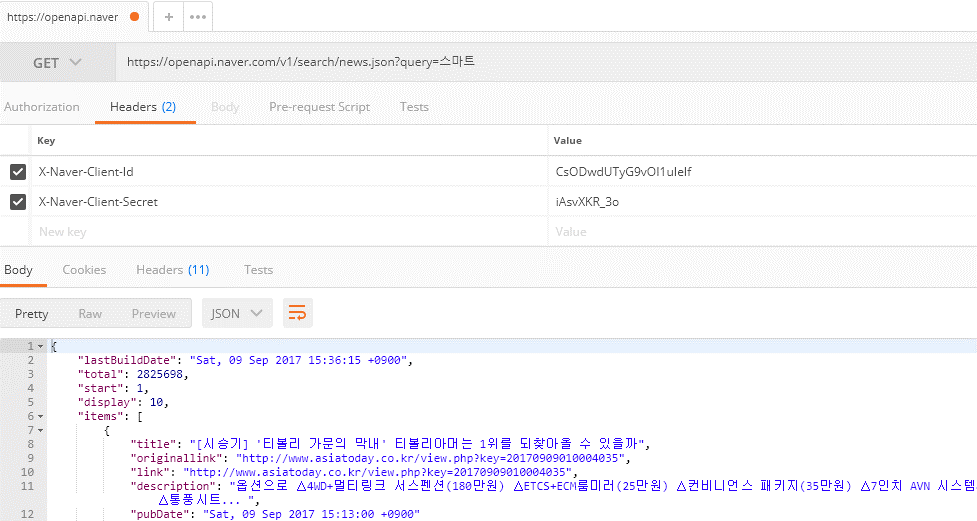

**JSON 이란?**
 - JavaScript Object Notation 줄임말
 - 웹환경에서 서버와 클라이언트 사이에 데이터를 주고 받을때 많이 사용
   - Rest API가 주요한 예제
 - 참고 (https://books.google.co.kr/books?id=euSiAwAAQBAJ&pg=PT1755&lpg=PT1755&dq=json+%EC%9E%A5%EC%A0%90&source=bl&ots=VjTIoOjbTK&sig=3t7MXA7g2CvEi8SyD0-GQVywzw0&hl=ko&sa=X&ved=0ahUKEwiwo8OvxJfWAhXDsJQKHYaBDpI4ChDoAQhVMAg#v=onepage&q=json%20%EC%9E%A5%EC%A0%90&f=false)

**3.2.1. 네이버 검색 Open API를 이용한 크롤링 초간단 실습**
 - https://developers.naver.com/main/
 - [블로그 검색 가이드 문서](https://developers.naver.com/docs/search/blog/)

**3.2.1.1. urllib 라이브러리를 활용한 크롤링 코드**

In [2]:
import urllib.request
import json

client_key = 'CsODwdUTyG9vOI1uIeIf'
client_secret = 'iAsvXKR_3o'
encText = urllib.parse.quote("스마트폰")
naver_url = 'https://openapi.naver.com/v1/search/news.json?query=' + encText

request = urllib.request.Request(naver_url)
request.add_header("X-Naver-Client-Id",client_key)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode == 200):
    response_body = response.read()
    data = json.loads(response_body)
    print (data['items'][0]['title'])
    print (data['items'][0]['description'])
else:
    print("Error Code:" + rescode)

ABL생명, 화상 고객서비스 이용률 '심상치 않네'
<b>스마트폰</b>에서 ‘ABL생명 화상 상담서비스’ 앱을 다운받고 신분증 촬영전송을 통한 본인 인증 후 서비스를 이용할 수 있다. 서비스 가능 시간은 영업일 오전 9시부터 오후 5시 30분까지다. 이와 더불어 ABL생명은 6개... 


**3.2.1.2. requests 라이브러리를 활용한 크롤링 코드 (권장)**

In [70]:
import requests
import json

client_key = 'CsODwdUTyG9vOI1uIeIf'
client_secret = 'iAsvXKR_3o'
naver_url = 'https://openapi.naver.com/v1/search/news.json?query=스마트폰'

header_params = {"X-Naver-Client-Id":client_key, "X-Naver-Client-Secret":client_secret}
response = requests.get(naver_url, headers = header_params)
# print (response.json())
# print (response.text())

if(response.status_code == 200):
    data = response.json()
    print (data['items'][0]['title'])
    print (data['items'][0]['description'])
else:
    print("Error Code:" + response.status_code)

'안나의 집' 김하종 신부의 나눔 인생 이야기
이들이 2세대라면, 6~7년 전부터 <b>스마트폰</b> 세대가 들어섰다고 한다. &quot;이 아이들에게 중요한 것은 자신, 자유예요. 어른들의 간섭을 받고 싶어 하지 않지요. 경제적으로나 문화적으로 중하위층에 있는 아이들이 어른들에게... 
